# Introduction

#### Dataset

Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.


#### Sumber data

dataset asli berasal dari data kaggle : https://www.kaggle.com/arjunbhasin2013/ccdata

#### Objective

membuat clustering pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran

#### Following is the Data Dictionary for Credit Card dataset :

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

# Data Loading

In [2]:
data = pd.read_csv('CC GENERAL.csv')

#### melihat data teratas

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data['CREDIT_LIMIT'].value_counts()

3000.0    784
1500.0    722
1200.0    621
1000.0    614
2500.0    612
         ... 
50.0        1
9700.0      1
6850.0      1
5450.0      1
3650.0      1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

#### melihat data terbawah

In [5]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


#### melihat info data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### melihat statistika data

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### melihat data shape

In [8]:
data.shape

(8950, 18)

data terdiri dari 18 columns dan 8950 rows

#### melihat columns data

In [9]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

# Data Cleaning

#### memilih features

In [10]:
col_to_use = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

dataset = data[col_to_use]

melakukan drop untuk features 'CUST_ID' karena tidak diperlukan dalam proses modeling

#### melihat  missing values

In [11]:
dataset.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
np.round(dataset.isnull().mean(),4)

BALANCE                             0.0000
BALANCE_FREQUENCY                   0.0000
PURCHASES                           0.0000
ONEOFF_PURCHASES                    0.0000
INSTALLMENTS_PURCHASES              0.0000
CASH_ADVANCE                        0.0000
PURCHASES_FREQUENCY                 0.0000
ONEOFF_PURCHASES_FREQUENCY          0.0000
PURCHASES_INSTALLMENTS_FREQUENCY    0.0000
CASH_ADVANCE_FREQUENCY              0.0000
CASH_ADVANCE_TRX                    0.0000
PURCHASES_TRX                       0.0000
CREDIT_LIMIT                        0.0001
PAYMENTS                            0.0000
MINIMUM_PAYMENTS                    0.0350
PRC_FULL_PAYMENT                    0.0000
TENURE                              0.0000
dtype: float64

terdapat mising values pada feature CREDIT_LIMIT sebesar 0.0001 dan MINIMUM_PAYMENTS sebesar 0.0350

#### mengatasi missing values

In [13]:
dataset.dropna(inplace=True)

<ipython-input-13-c5a91072ea31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


melakukan proses dropna atau menghapus rows dalam mengatasi missing values variabel CREDIT_LIMIT dan MINIMUM_PAYMENTS, hal tersebut dilakukan karena persentase missing values tidak signifikan

#### melihat dataset setelah mengatasi missing values

In [14]:
dataset.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Explorasi Data Analysis

#### mengelompokan discrete features

In [15]:
discrete_features = [var for var in dataset.columns if dataset[var].dtypes == 'int']

In [16]:
print("variabel yang termasuk dalam dicrete features adalah: \n", discrete_features)

variabel yang termasuk dalam dicrete features adalah: 
 ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']


#### melakukan visualisasi discrete features dengan features PURCHASES

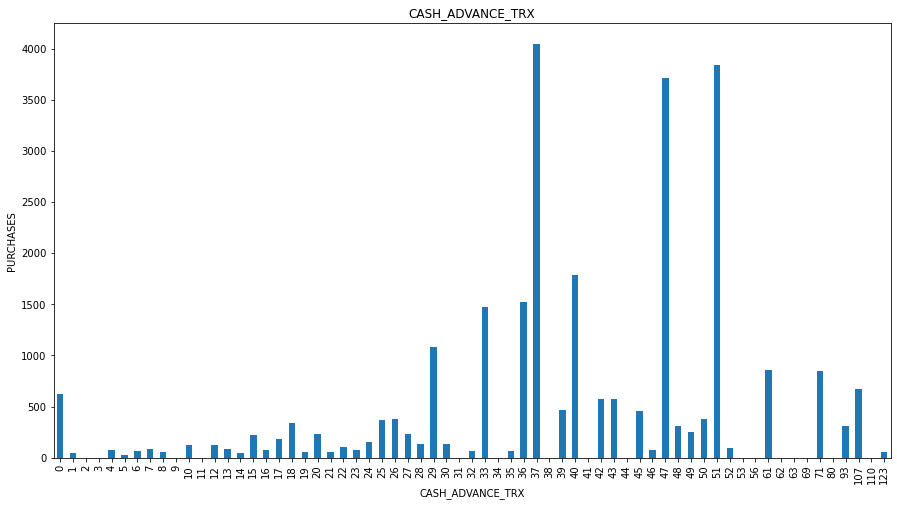

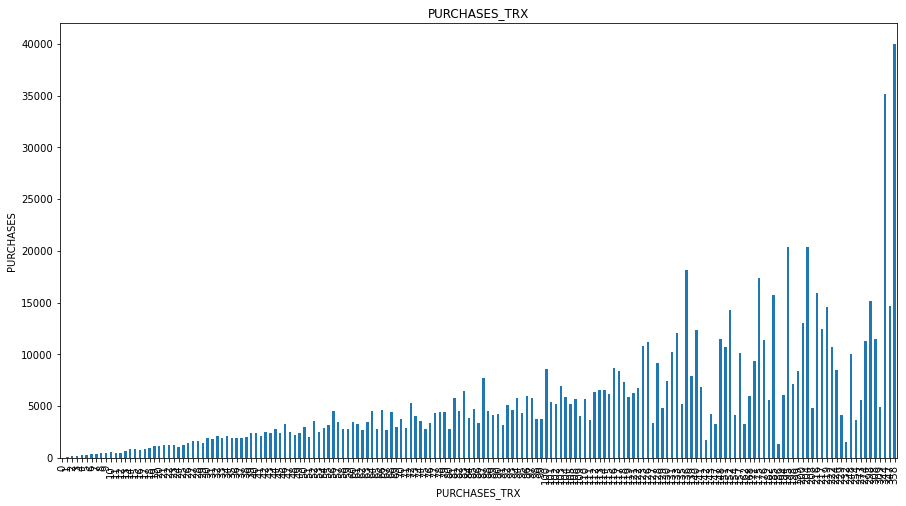

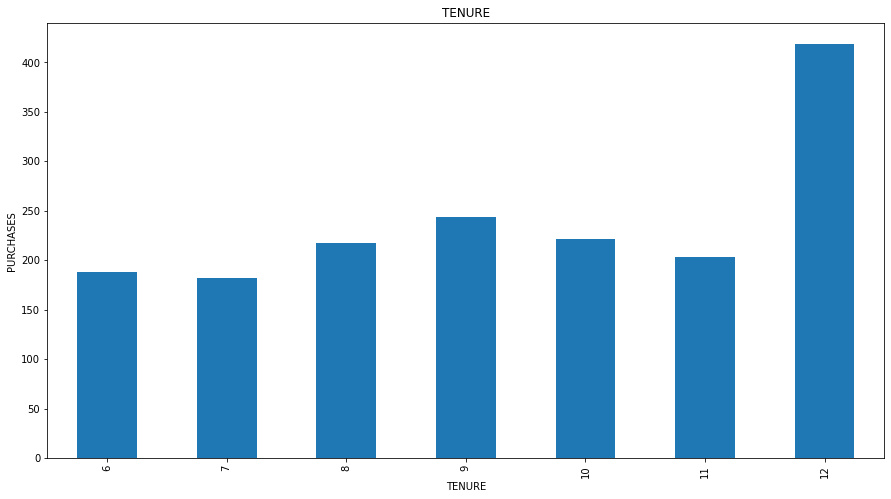

In [17]:
for feature in discrete_features:
    data = dataset.copy()
    
    data.groupby(feature)['PURCHASES'].median().plot.bar(figsize=(15,8))
    plt.xlabel(feature)
    plt.ylabel('PURCHASES')
    plt.title(feature)
    plt.show()

dari visualisasi terlihat bahwa:

* Jumlah Transaksi yang dilakukan dengan "Cash in Advanced" pada nilai 37, 47, dan 51 melakukan pembelian dengan nilai tertinggi

* Semakin lama tenure kartu kredit yang dimiliki oleh konsumen maka semakin besar jumlah yang dibelanjakan oleh konsumen

* Semakin besar nilai yang dibelanjakan oleh konsumen dengan menggunakan kartu kredit maka semakin besar juga Jumlah transaksi pembelian yang dilakukan, hal ini bisa diartikan bahwa konsumen tidak melakukan satu pembelian dengan nilai yang besar. 

### Continous Features

In [18]:
continous_features = [var for var in dataset.columns if dataset[var].dtypes == 'float' and var not in ['PURCHASES']]


print("variabel yang termasuk dalam continous features adalah: \n", continous_features)

variabel yang termasuk dalam continous features adalah: 
 ['BALANCE', 'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


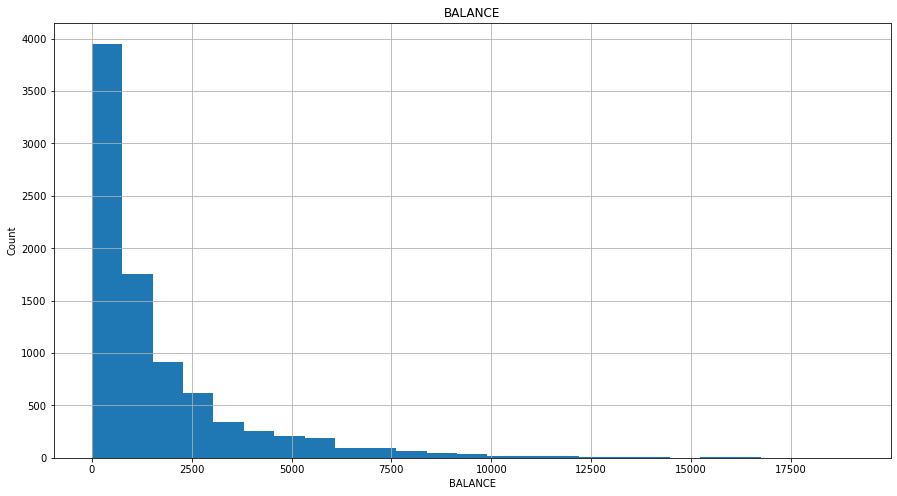

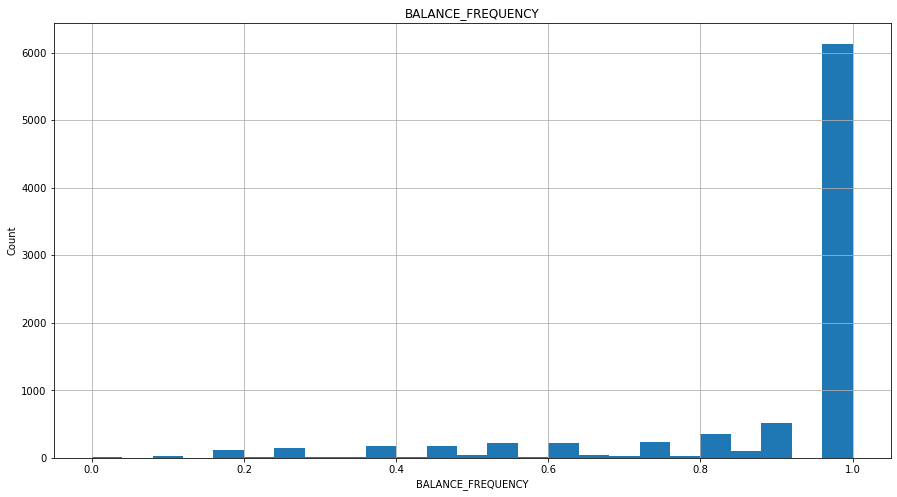

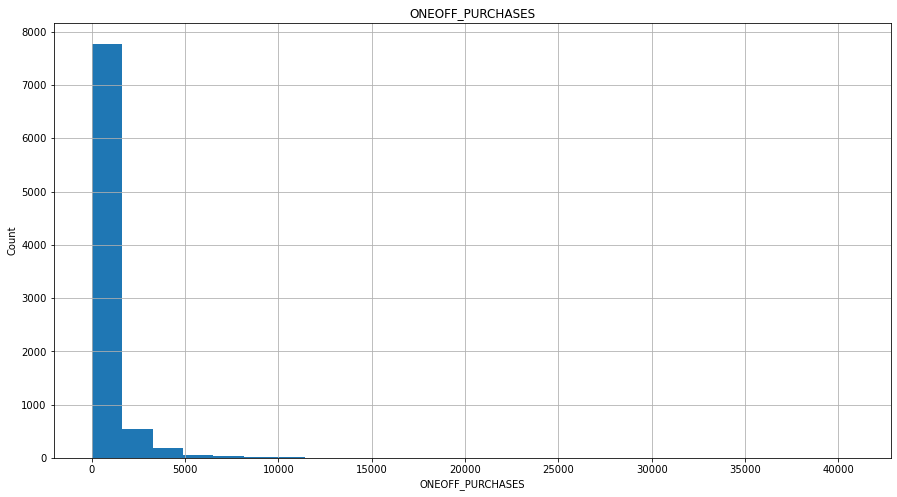

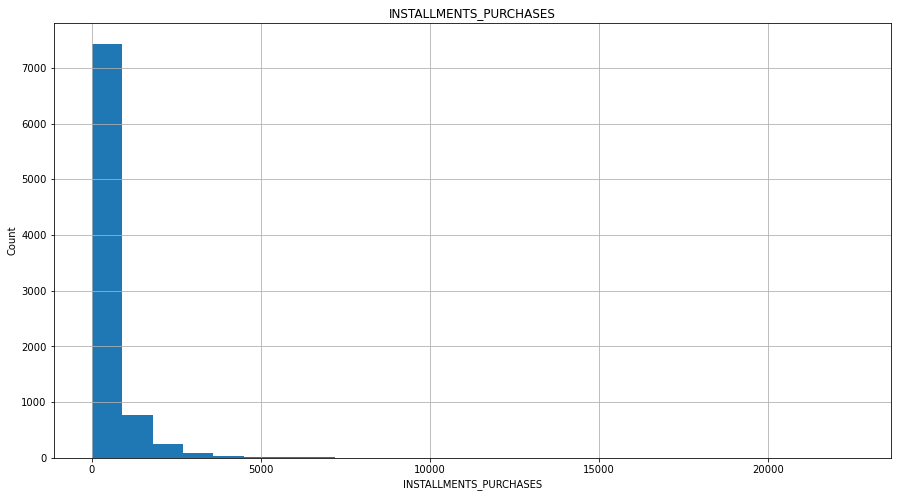

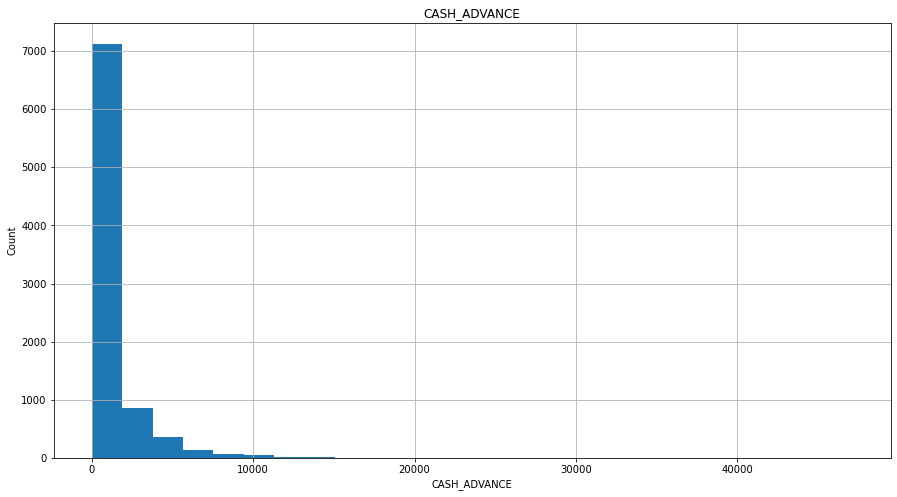

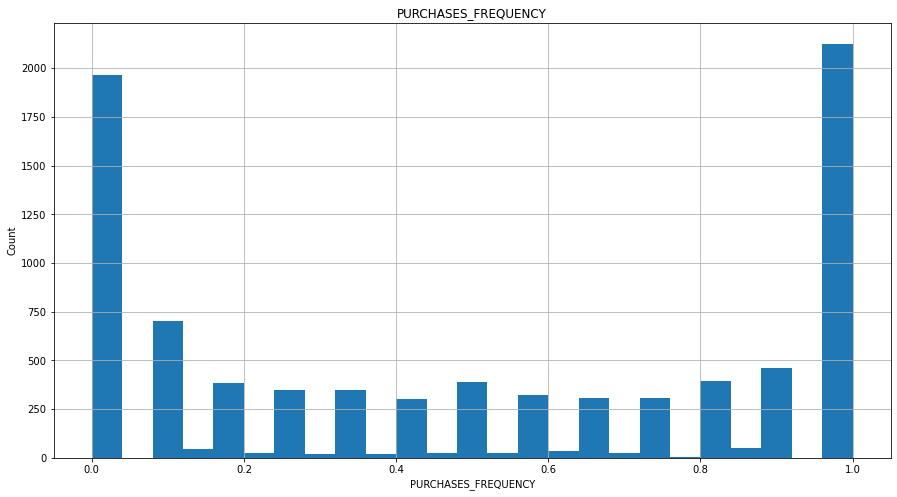

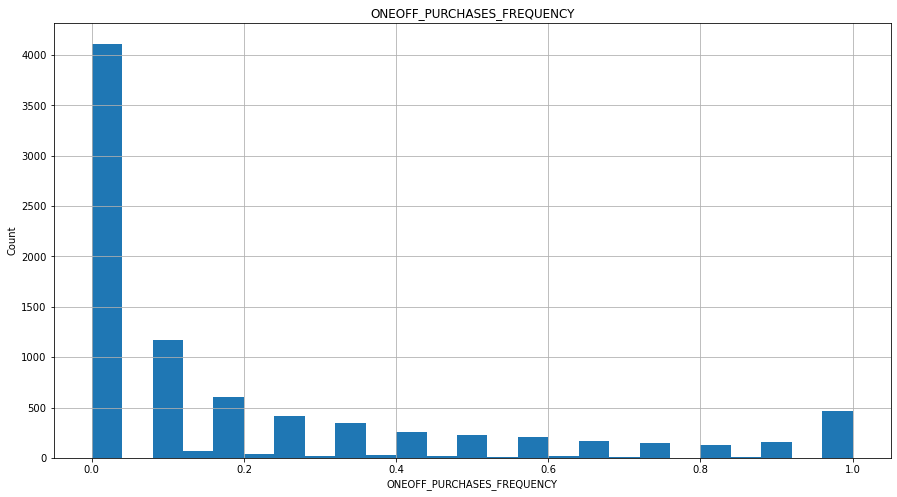

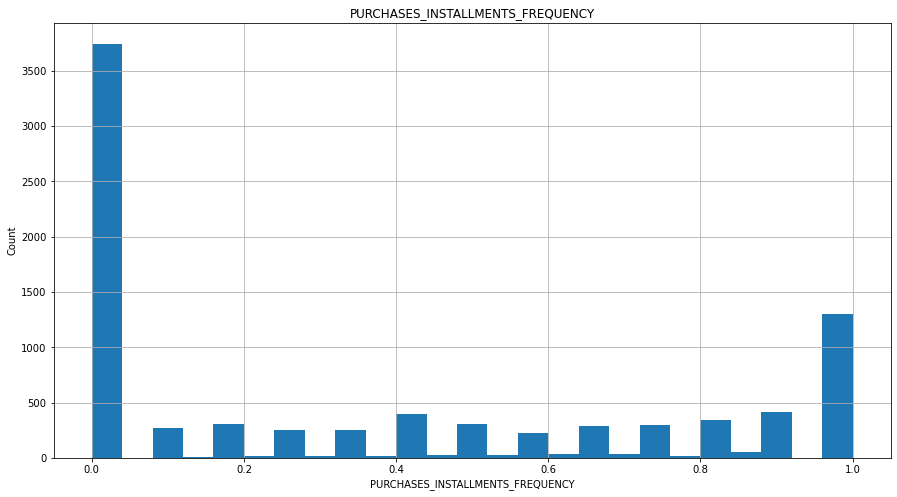

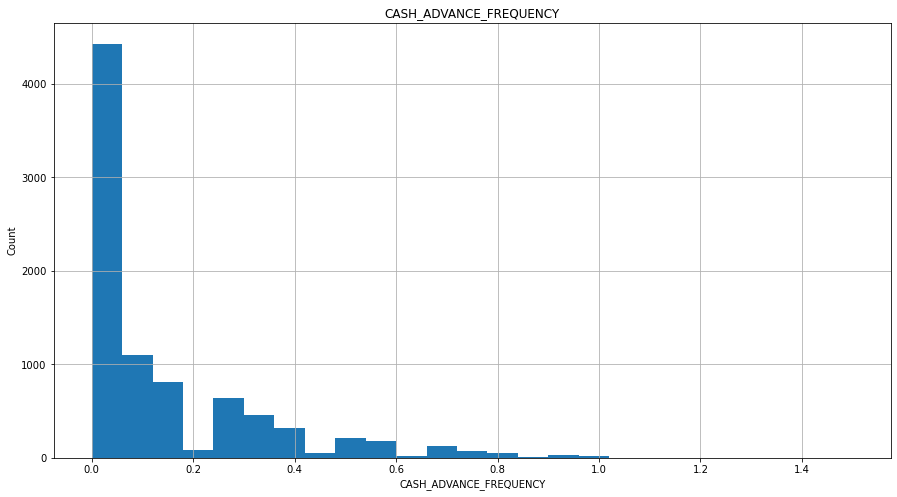

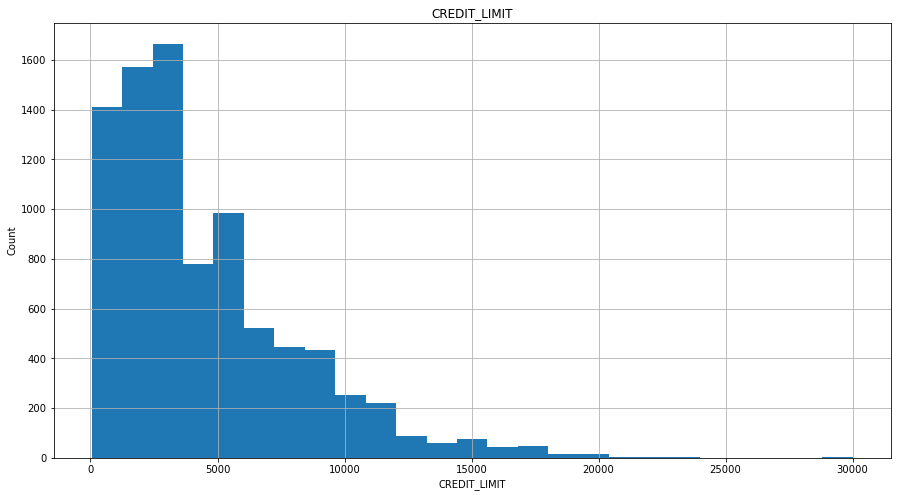

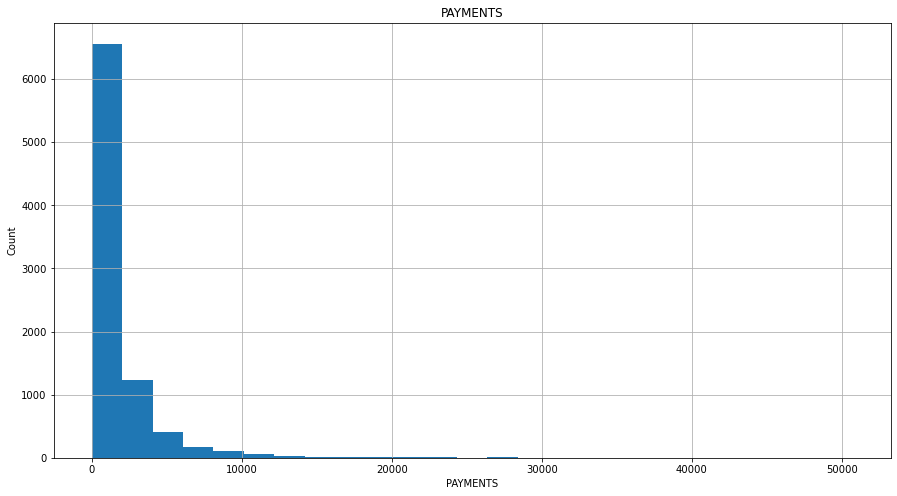

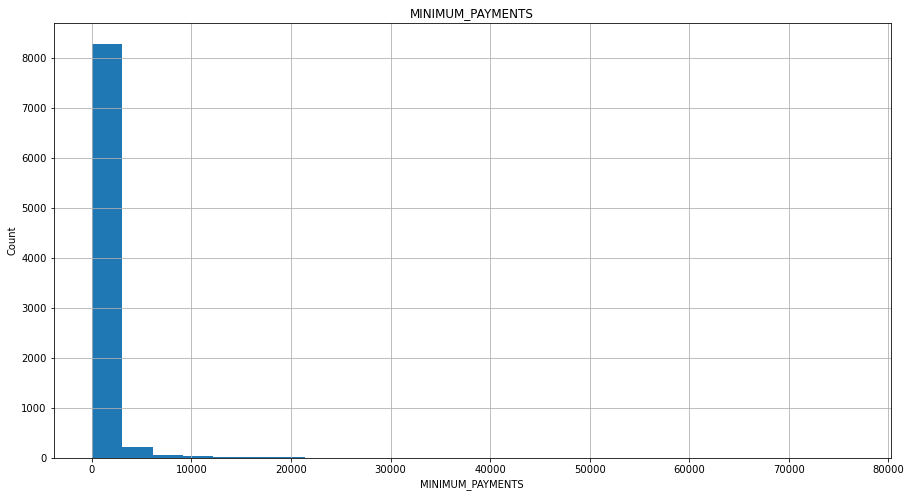

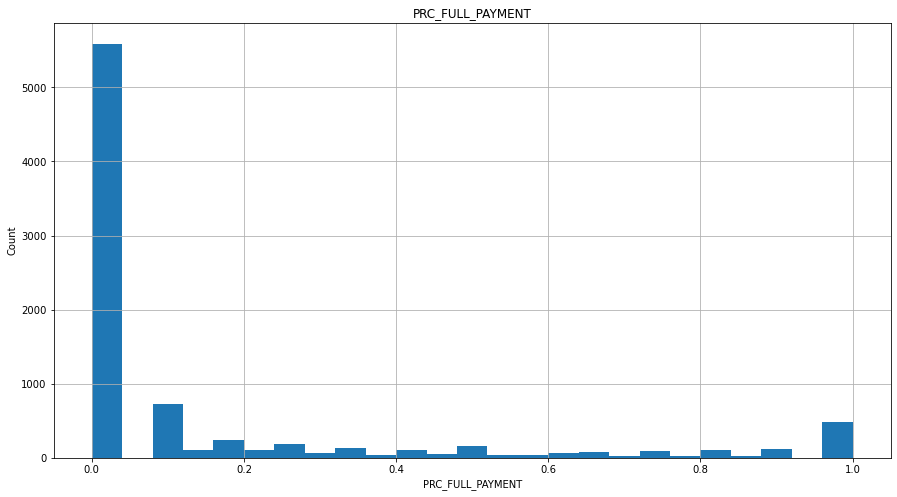

In [19]:
for feature in continous_features:
    data = dataset.copy()
    data[feature].hist(bins=25, figsize=(15,8))
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

dari visualisasi terlihat bahwa data continous features tidak terdistribusi secara normal

#### melakukan logarithmic transformation dan visualisasi terhadap features Purchase

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


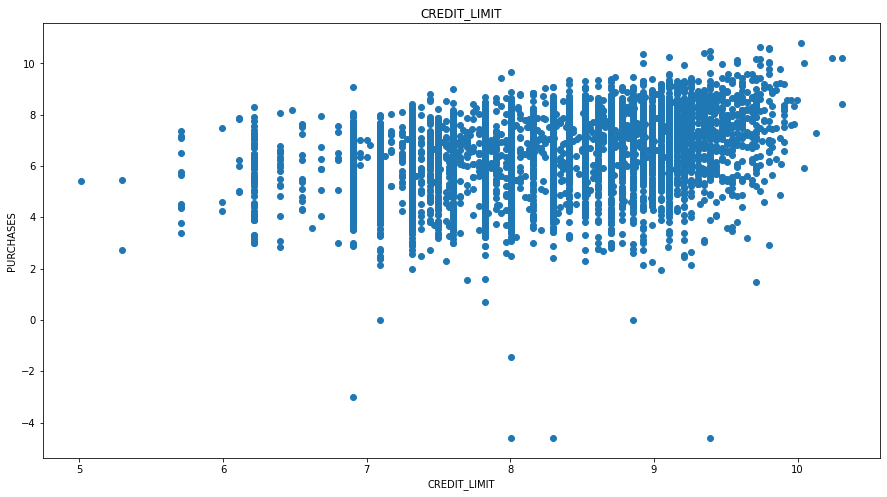

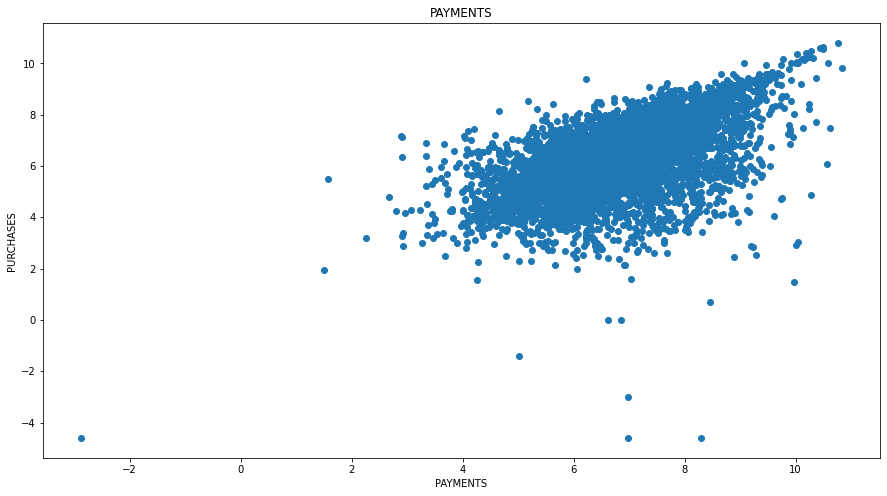

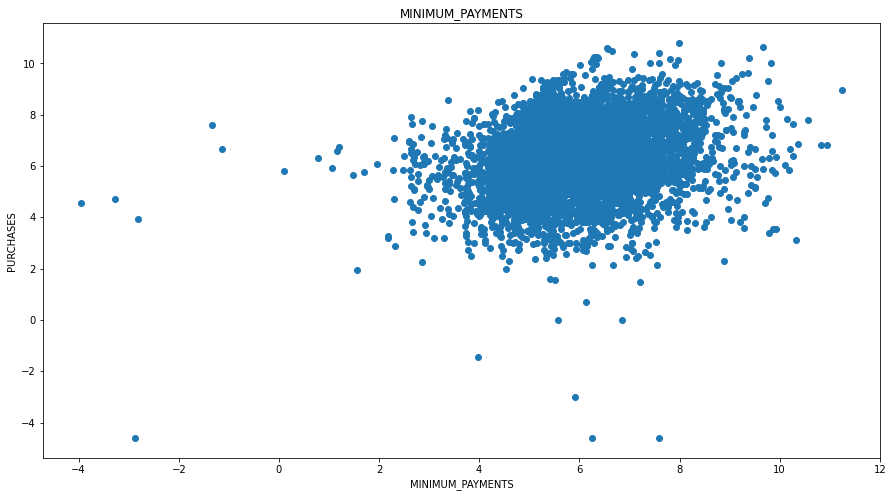

In [20]:
for feature in continous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['PURCHASES']=np.log(data['PURCHASES'])
        plt.subplots(figsize=(15,8))
        plt.scatter(data[feature],data['PURCHASES'])
        plt.xlabel(feature)
        plt.ylabel('PURCHASES')
        plt.title(feature)
        plt.show()

dari visualisasi terlihat bahwa:


* semakin besar Credit_Limit kartu kredit yang dimiliki oleh konsumen maka konsumen tersebut akan semakin tinggi didalam melakukan nilai transaksi pembelanjaan
* semakin tinggi nilai pembelanjaan yang dilakukan oleh konsumen maka semakin besar nilai pembayaran yang berhasil dilakukan atau dengan kata lain tidak menunggak
* semakin besar nilai tagihan minimum yang dibayarkan oleh konsumen maka akan semakin besar nilai yang dibelanjakan atau dengan kata lain konsumen selalu membayar sesuai dengan minimum tagihan dan tidak langsung melunasi tagihan kartu kredit

## Exploratory Data Analysis keseluruhan

Dari hasil visualisasi didapatkan informasi sebagai berikut:

* Jumlah Transaksi yang dilakukan dengan "Cash in Advanced" pada nilai 37, 47, dan 51 melakukan pembelian dengan nilai tertinggi
* Semakin lama tenure kartu kredit yang dimiliki oleh konsumen maka semakin besar jumlah yang dibelanjakan oleh konsumen
* Semakin besar nilai yang dibelanjakan oleh konsumen dengan menggunakan kartu kredit maka semakin besar juga Jumlah transaksi pembelian yang dilakukan, hal ini bisa diartikan bahwa konsumen tidak melakukan satu pembelian dengan nilai yang besar. 
* semakin besar Credit_Limit kartu kredit yang dimiliki oleh konsumen maka konsumen tersebut akan semakin tinggi didalam melakukan nilai transaksi pembelanjaan
* semakin tinggi nilai pembelanjaan yang dilakukan oleh konsumen maka semakin besar nilai pembayaran yang berhasil dilakukan atau dengan kata lain tidak menunggak
* semakin besar nilai tagihan minimum yang dibayarkan oleh konsumen maka akan semakin besar nilai yang dibelanjakan atau dengan kata lain konsumen selalu membayar sesuai dengan minimum tagihan dan tidak langsung melunasi tagihan kartu kredit

# Data Preprocessing

#### melihat values features columns 

In [21]:
for col in dataset.columns:
    print(col,dataset[col].unique()[0:20], '\n')

BALANCE [  40.900749 3202.467416 2495.148862  817.714335 1809.828751  627.260806
 1823.652743 1014.926473  152.225975 1293.124939  630.794744 1516.92862
  921.693369 2772.772734 6886.213231 2072.074354   41.089489 1989.072228
 3577.970933 2016.684686] 

BALANCE_FREQUENCY [0.818182 0.909091 1.       0.545455 0.875    0.454545 0.636364 0.727273
 0.5      0.888889 0.272727 0.363636 0.666667 0.75     0.857143 0.090909
 0.333333 0.181818 0.6      0.3     ] 

PURCHASES [  95.4     0.    773.17   16.   1333.28 7091.01  436.2   861.49 1281.6
  920.12 1492.18 3217.99 2137.93 1611.7   519.    504.35  398.64  176.68
 6359.95  815.9 ] 

ONEOFF_PURCHASES [   0.    773.17   16.   6402.63  661.49 1281.6  1492.18 2500.23  419.96
  166.   5910.04 3454.56  102.    204.55 1013.2   400.    324.95  636.79
 1642.17  204.  ] 

INSTALLMENTS_PURCHASES [  95.4     0.   1333.28  688.38  436.2   200.    920.12  717.76 1717.97
 1611.7   519.    338.35  398.64  176.68  449.91  815.9   793.79  399.6
  233.28  182.5 

#### melakukan proses binning

In [22]:
dataset['BALANCE'] = pd.cut(dataset['BALANCE'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['CASH_ADVANCE'] = pd.cut(dataset['CASH_ADVANCE'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['PURCHASES'] = pd.cut(dataset['PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['ONEOFF_PURCHASES'] = pd.cut(dataset['ONEOFF_PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['INSTALLMENTS_PURCHASES'] = pd.cut(dataset['INSTALLMENTS_PURCHASES'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['CREDIT_LIMIT'] = pd.cut(dataset['CREDIT_LIMIT'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['PAYMENTS'] = pd.cut(dataset['PAYMENTS'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')
dataset['MINIMUM_PAYMENTS'] = pd.cut(dataset['MINIMUM_PAYMENTS'], [-1.0 , 500.0 , 1000.0  ,3000.0 , 5000.0 , 7000.0 , 10000.0 , 1000000.0 ], labels=[1,2,3,4,5,6,7]).astype('int64')

In [23]:
dataset['BALANCE_FREQUENCY'] = pd.cut(dataset['BALANCE_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
dataset['PURCHASES_FREQUENCY'] = pd.cut(dataset['PURCHASES_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
dataset['ONEOFF_PURCHASES_FREQUENCY'] = pd.cut(dataset['ONEOFF_PURCHASES_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
dataset['PURCHASES_INSTALLMENTS_FREQUENCY'] = pd.cut(dataset['PURCHASES_INSTALLMENTS_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
dataset['CASH_ADVANCE_FREQUENCY'] = pd.cut(dataset['CASH_ADVANCE_FREQUENCY'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')
dataset['PRC_FULL_PAYMENT'] = pd.cut(dataset['PRC_FULL_PAYMENT'], [-1.0 ,  0.5 , 1.51 ], labels=[0, 1]).astype('int64')

In [24]:
dataset['PURCHASES_TRX'] = pd.cut(dataset['PURCHASES_TRX'], [-1.0 , 5.0 , 10.0  , 20.0 , 30.0 , 40.0 , 50.0 , 100.0, 500 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')
dataset['CASH_ADVANCE_TRX'] = pd.cut(dataset['CASH_ADVANCE_TRX'], [-1.0 , 5.0 , 10.0  , 20.0 , 30.0 , 40.0 , 50.0 , 100.0, 500 ], labels=[1,2,3,4,5,6,7,8]).astype('int64')

proses binning dilakukan dengan mengelompokkan data numeric ke dalam bagian-bagian yang lebih kecil agar sebaran data lebih mudah dipahami

#### melihat values features columns setelah dilakukan proses binning

In [25]:
for col in dataset.columns:
    print(col,dataset[col].unique()[0:20], '\n')

BALANCE [1 4 3 2 5 6 7] 

BALANCE_FREQUENCY [1 0] 

PURCHASES [1 2 3 6 4 5 7] 

ONEOFF_PURCHASES [1 2 5 3 4 7 6] 

INSTALLMENTS_PURCHASES [1 3 2 4 5 7 6] 

CASH_ADVANCE [1 5 3 6 2 4 7] 

PURCHASES_FREQUENCY [0 1] 

ONEOFF_PURCHASES_FREQUENCY [0 1] 

PURCHASES_INSTALLMENTS_FREQUENCY [0 1] 

CASH_ADVANCE_FREQUENCY [0 1] 

CASH_ADVANCE_TRX [1 2 3 5 4 8 7 6] 

PURCHASES_TRX [1 3 2 7 4 6 5 8] 

CREDIT_LIMIT [2 5 6 3 7 4 1] 

PAYMENTS [1 4 2 3 5 6 7] 

MINIMUM_PAYMENTS [1 3 2 7 4 6 5] 

PRC_FULL_PAYMENT [0 1] 

TENURE [12  8 11  9 10  6  7] 



#### melihat info data setelah melakukan proses binning

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   BALANCE                           8636 non-null   int64
 1   BALANCE_FREQUENCY                 8636 non-null   int64
 2   PURCHASES                         8636 non-null   int64
 3   ONEOFF_PURCHASES                  8636 non-null   int64
 4   INSTALLMENTS_PURCHASES            8636 non-null   int64
 5   CASH_ADVANCE                      8636 non-null   int64
 6   PURCHASES_FREQUENCY               8636 non-null   int64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   int64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   int64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   int64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64
 11  PURCHASES_TRX                     8636 non-null   int64
 12  CREDIT_LIMIT                      

#### menentukan variabel X

In [27]:
X = dataset

#### melakukan normalisasi data

In [28]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8636, 17)

#### menggunakan metode elbow untuk menentukan angka cluster

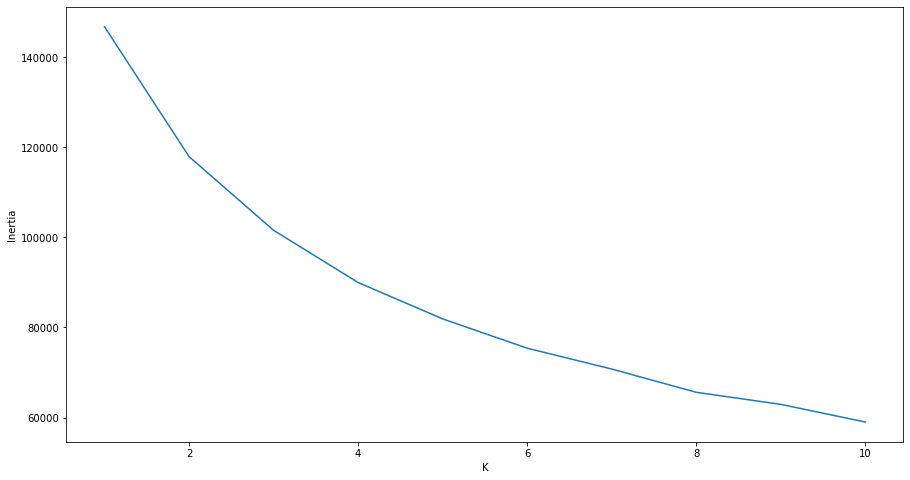

In [29]:
K=[1,2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.subplots(figsize=(15,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

dari metode elbow terlihat bahwa jumlah cluster yang baik adalah 6 cluster

# Pendefinisian dan Pelatihan Model

#### Mendefinisikan dan melatih KMeans clustering

In [30]:
kmeans= KMeans(n_clusters=6, random_state=42)

%time kmeans.fit(X)

CPU times: user 579 ms, sys: 76.1 ms, total: 655 ms
Wall time: 644 ms


KMeans(n_clusters=6, random_state=42)

#### mendefinisikan dan melatih DBSCAN

In [31]:
dbscan = DBSCAN(eps=0.05, min_samples=6)

%time dbscan.fit(X)

CPU times: user 2.51 s, sys: 720 ms, total: 3.23 s
Wall time: 4.22 s


DBSCAN(eps=0.05, min_samples=6)

#### mendefinisikan dan melatih AgglomerativeClustering

In [32]:
agglo = AgglomerativeClustering(n_clusters=6, linkage="ward")

%time agglo.fit(X)

CPU times: user 7.44 s, sys: 734 ms, total: 8.17 s
Wall time: 10.7 s


AgglomerativeClustering(n_clusters=6)

#### menambahkan features KMeans dalam dataset

In [33]:
kmeans_segment = kmeans.labels_

In [34]:
data_kmeans = dataset.copy()
data_kmeans['kmeans_cluster'] = kmeans_segment
data_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,12,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,12,5
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,12,1
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,12,0
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,12,2


#### menambahkan features DBSCAN dalam dataset

In [35]:
dbscan_segment = dbscan.labels_

In [36]:
data_dbscan = dataset.copy()
data_dbscan['dbscan_cluster'] = dbscan_segment
data_dbscan.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dbscan_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,12,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,12,-1
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,12,-1
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,12,1
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,12,-1


#### menambahkan features Agglomerative dalam dataset

In [37]:
agglo_segment = agglo.labels_

In [38]:
data_ac = dataset.copy()
data_ac['dbscan_cluster'] = agglo_segment
data_ac.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,dbscan_cluster
0,1,1,1,1,1,1,0,0,0,0,1,1,2,1,1,0,12,0
1,4,1,1,1,1,5,0,0,0,0,1,1,5,4,3,0,12,0
2,3,1,2,2,1,1,1,1,0,0,1,3,6,2,2,0,12,3
4,2,1,1,1,1,1,0,0,0,0,1,1,3,2,1,0,12,0
5,3,1,3,1,3,1,1,0,1,0,1,2,3,3,3,0,12,1


### Visualisasi Model Clustering

#### menggunakan  PCA untuk melakukan transformasi data menjadi 2 dimensi sebelum dilakukan visualization

In [39]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8636, 2)

#### Melakukan Visualisasi segmentesi konsumen

In [40]:
# melakukan prediksi kmeans dengan data x
y_kmeans = kmeans.fit_predict(X)

In [41]:
# melakukan prediksi dbscan dengan data x
y_dbscan = dbscan.fit_predict(X)

In [42]:
# melakukan prediksi AC dengan data x
y_agglo = agglo.fit_predict(X)

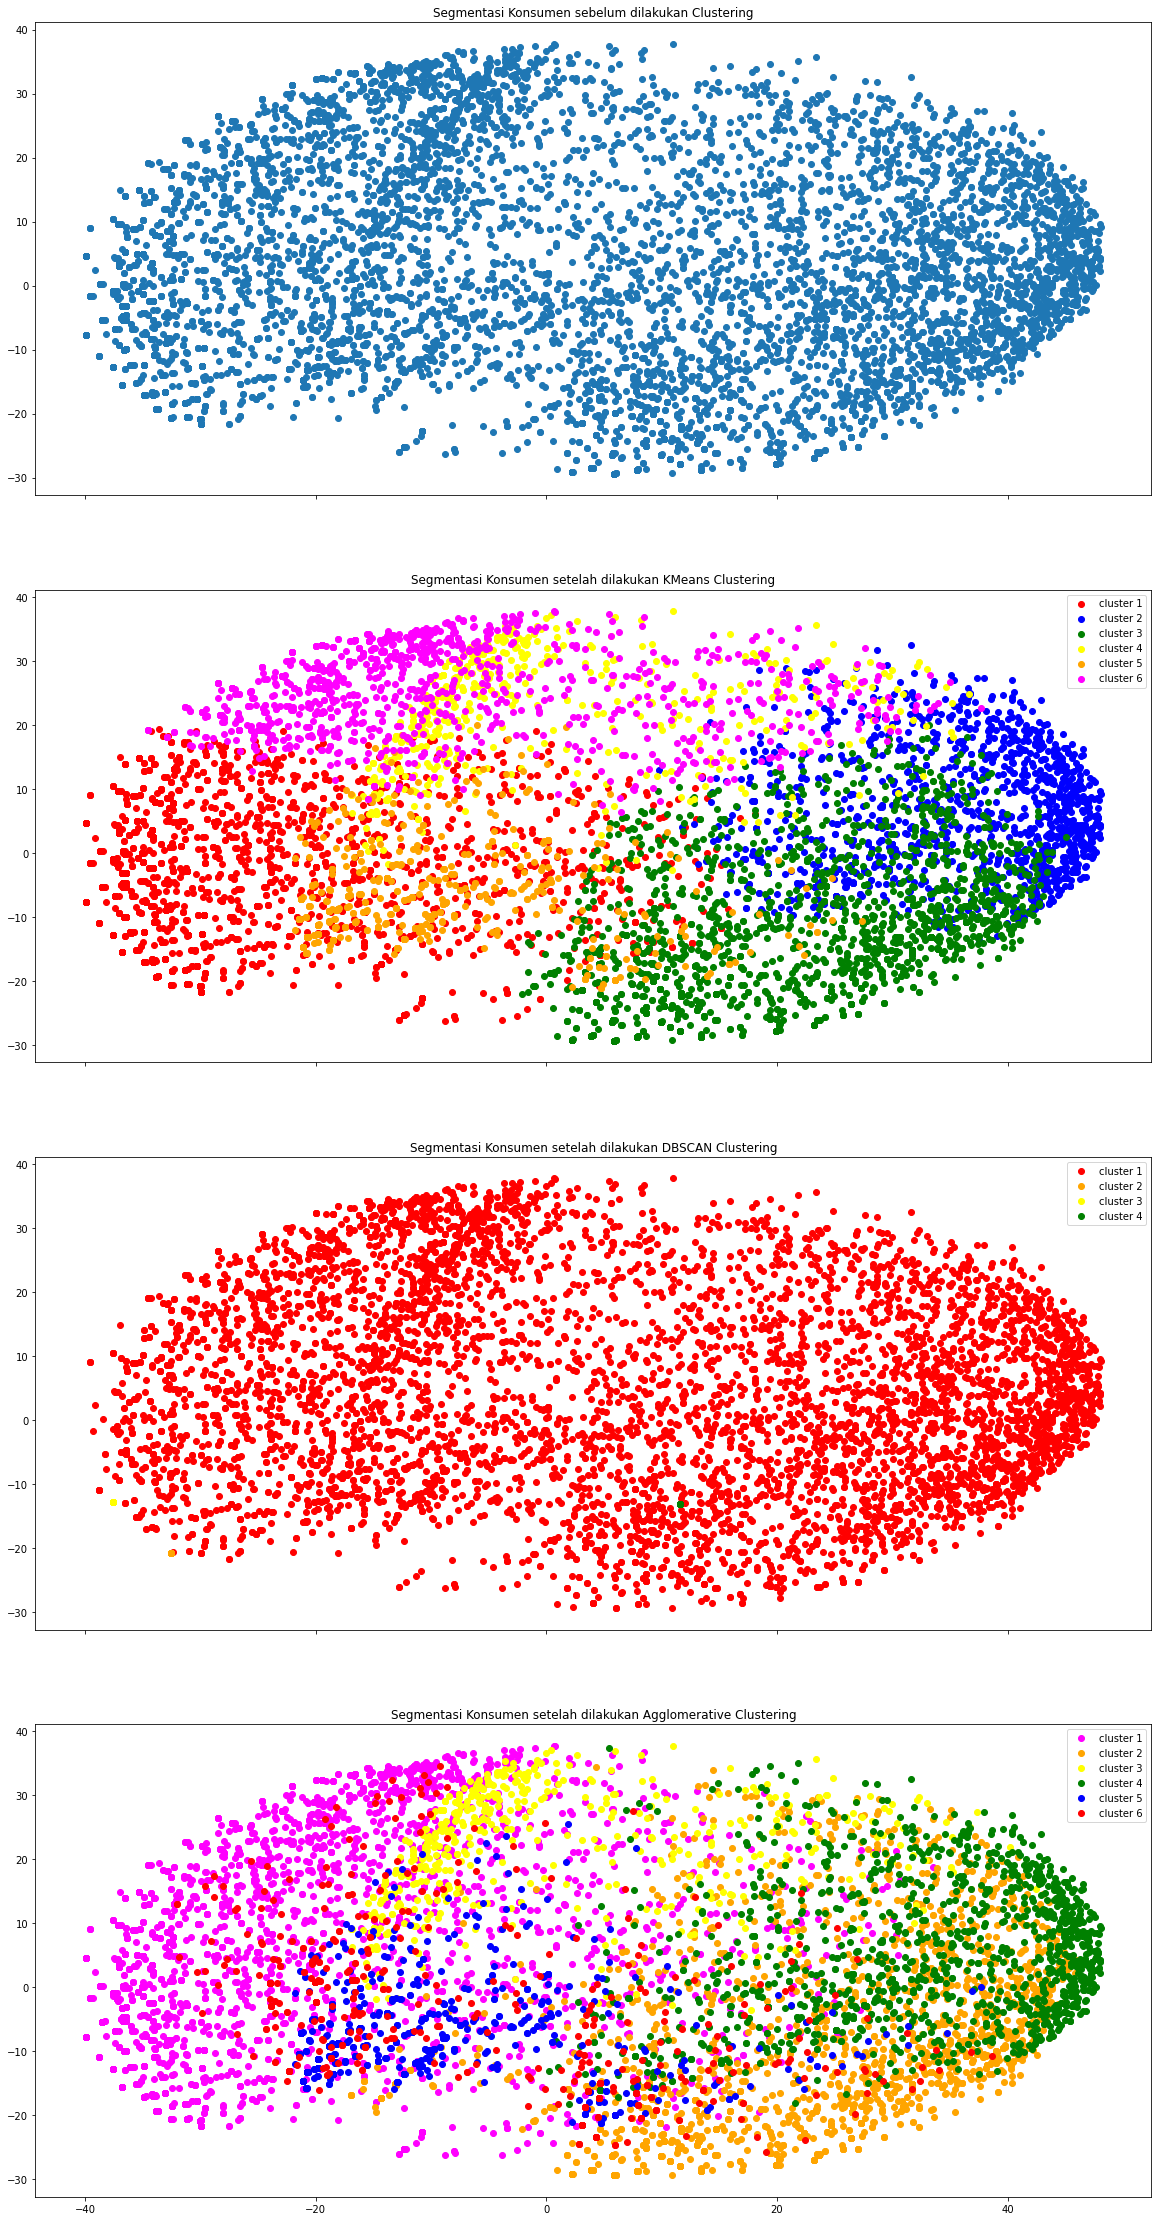

In [43]:
# Subplots of chol, age thalach
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4,
                                      ncols=1,
                                      figsize=(20,40),
                                      sharex=True
                                     )
# add data to ax0
scatter = ax0.scatter(X_PCA[:, 0], X_PCA[:, 1]);

# customize ax0
ax0.set(title='Segmentasi Konsumen sebelum dilakukan Clustering');

# add data to ax1
scatter = ax1.scatter(X_PCA[y_kmeans == 0, 0], X_PCA[y_kmeans == 0, 1], c='red', label='cluster 1');
scatter = ax1.scatter(X_PCA[y_kmeans == 1, 0], X_PCA[y_kmeans == 1, 1], c='blue', label='cluster 2');
scatter = ax1.scatter(X_PCA[y_kmeans == 2, 0], X_PCA[y_kmeans == 2, 1], c='green', label='cluster 3');
scatter = ax1.scatter(X_PCA[y_kmeans == 3, 0], X_PCA[y_kmeans == 3, 1], c='yellow', label='cluster 4');
scatter = ax1.scatter(X_PCA[y_kmeans == 4, 0], X_PCA[y_kmeans == 4, 1], c='orange', label='cluster 5');
scatter = ax1.scatter(X_PCA[y_kmeans == 5, 0], X_PCA[y_kmeans == 5, 1], c='magenta', label='cluster 6');

# customize ax1
ax1.set(title='Segmentasi Konsumen setelah dilakukan KMeans Clustering');

# add legend ax1
ax1.legend();

# add data to ax2
scatter = ax2.scatter(X_PCA[y_dbscan== -1, 0], X_PCA[y_dbscan == -1, 1], c='red' , label='cluster 1');
scatter = ax2.scatter(X_PCA[y_dbscan == 0, 0], X_PCA[y_dbscan == 0, 1], c='orange' , label='cluster 2');
scatter = ax2.scatter(X_PCA[y_dbscan == 1, 0], X_PCA[y_dbscan == 1, 1], c='yellow', label='cluster 3');
scatter = ax2.scatter(X_PCA[y_dbscan == 2, 0], X_PCA[y_dbscan == 2, 1], c='green' , label='cluster 4');


# customize ax2
ax2.set(title='Segmentasi Konsumen setelah dilakukan DBSCAN Clustering');

# add legend ax2
ax2.legend();

# add data to ax3
scatter = ax3.scatter(X_PCA[y_agglo == 0, 0], X_PCA[y_agglo == 0, 1], c='magenta' , label='cluster 1');
scatter = ax3.scatter(X_PCA[y_agglo == 1, 0], X_PCA[y_agglo == 1, 1], c='orange' , label='cluster 2');
scatter = ax3.scatter(X_PCA[y_agglo == 2, 0], X_PCA[y_agglo == 2, 1], c='yellow', label='cluster 3');
scatter = ax3.scatter(X_PCA[y_agglo == 3, 0], X_PCA[y_agglo == 3, 1], c='green' , label='cluster 4');
scatter = ax3.scatter(X_PCA[y_agglo == 4, 0], X_PCA[y_agglo == 4, 1],  c='blue', label='cluster 5');
scatter = ax3.scatter(X_PCA[y_agglo == 5, 0], X_PCA[y_agglo == 5, 1], c='red', label='cluster 6');

# customize ax3
ax3.set(title='Segmentasi Konsumen setelah dilakukan Agglomerative Clustering');

# add legend ax3
ax3.legend();


# Model Inference

### membuat data baru

In [44]:
values_1 = [3, 10, 3, 1, 3, 1, 7, 1, 6, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_2 = [3, 9, 3, 1, 3, 1, 6, 1, 5, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_3 = [3, 8, 3, 1, 3, 1, 5, 1, 4, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_4 = [3, 7, 3, 1, 3, 1, 4, 1, 3, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_5 = [3, 6, 3, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 3, 1, 12 ]
values_6 = [3, 5, 3, 1, 3, 1, 2, 1, 1, 1, 1, 2, 3, 3, 3, 1, 12 ]

In [45]:
values = [ values_1, values_2, values_3, values_4, values_5, values_6 ] 

In [46]:
data_dummies = pd.DataFrame(values, columns=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])

### melihat data baru

In [47]:
data_dummies

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3,10,3,1,3,1,7,1,6,1,1,2,3,3,3,1,12
1,3,9,3,1,3,1,6,1,5,1,1,2,3,3,3,1,12
2,3,8,3,1,3,1,5,1,4,1,1,2,3,3,3,1,12
3,3,7,3,1,3,1,4,1,3,1,1,2,3,3,3,1,12
4,3,6,3,1,3,1,3,1,2,1,1,2,3,3,3,1,12
5,3,5,3,1,3,1,2,1,1,1,1,2,3,3,3,1,12


## Melakukan prediksi dengan KMeans Clustering

In [48]:
predictions_kmeans = kmeans.fit_predict(data_dummies)

print("Hasil prediksi model KMeans Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_kmeans[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_kmeans[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_kmeans[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_kmeans[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_kmeans[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_kmeans[5]))

Hasil prediksi model KMeans Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster 4
Konsumen Kartu kredit 2 termasuk dalam cluster 1
Konsumen Kartu kredit 3 termasuk dalam cluster 2
Konsumen Kartu kredit 4 termasuk dalam cluster 0
Konsumen Kartu kredit 5 termasuk dalam cluster 5
Konsumen Kartu kredit 6 termasuk dalam cluster 3


#### Melakukan prediksi dengan DBSCAN Clustering

In [49]:
predictions_dbscan = dbscan.fit_predict(data_dummies)

print("Hasil prediksi model DBSCAN Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_dbscan[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_dbscan[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_dbscan[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_dbscan[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_dbscan[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_dbscan[5]))

Hasil prediksi model DBSCAN Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster -1
Konsumen Kartu kredit 2 termasuk dalam cluster -1
Konsumen Kartu kredit 3 termasuk dalam cluster -1
Konsumen Kartu kredit 4 termasuk dalam cluster -1
Konsumen Kartu kredit 5 termasuk dalam cluster -1
Konsumen Kartu kredit 6 termasuk dalam cluster -1


#### Melakukan prediksi dengan AgglomerativeClustering

In [50]:
predictions_ac = agglo.fit_predict(data_dummies)

print("Hasil prediksi model Agglomerative Clustering: \n")
print('Konsumen Kartu kredit 1 termasuk dalam cluster {}'.format(predictions_ac[0]))
print('Konsumen Kartu kredit 2 termasuk dalam cluster {}'.format(predictions_ac[1]))
print('Konsumen Kartu kredit 3 termasuk dalam cluster {}'.format(predictions_ac[2]))
print('Konsumen Kartu kredit 4 termasuk dalam cluster {}'.format(predictions_ac[3]))
print('Konsumen Kartu kredit 5 termasuk dalam cluster {}'.format(predictions_ac[4]))
print('Konsumen Kartu kredit 6 termasuk dalam cluster {}'.format(predictions_ac[5]))

Hasil prediksi model Agglomerative Clustering: 

Konsumen Kartu kredit 1 termasuk dalam cluster 5
Konsumen Kartu kredit 2 termasuk dalam cluster 3
Konsumen Kartu kredit 3 termasuk dalam cluster 4
Konsumen Kartu kredit 4 termasuk dalam cluster 2
Konsumen Kartu kredit 5 termasuk dalam cluster 1
Konsumen Kartu kredit 6 termasuk dalam cluster 0


# Model Analysis

#### Analysis model inferent

dari hasil mencoba data baru untuk melakukan prediksi menggunakan model clustering Kmeans, DBSCAN dan Angglomerative dapat ditarik informasi sebagai berikut:

* Dalam setiap Perubahan pada nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY akan mengakibatkan atau merubah type cluster konsumen pada model clustering KMeans dan Angglomerative
* Setiap perubahan type cluster konsumen dalam **model Agglomerative bersifat berbanding lurus** dengan perubahan nilai **features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY** atau perubahan terjadi berurutan bedasarkan dari nilai features terkecil  
* Setiap perubahan type cluster konsumen dalam **model KMeans bersifat randomize (acak)** dengan perubahan **nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY** atau perubahan terjadi tidak terpengaruh dari urutan nilai features  
* Hasil prediksi dengan menggunakan data baru untuk model DBSCAN Clustering hanya menghasilkan satu type cluster konsumen saja 


#### pemilihan model

berdasarkan perbandingan antara algoritma model KMeans, DBSCAN, dan Agglomerative maka model yang dipilih adalah model **Clustering KMeans** karena menghasilkan hasil clustering yang **lebih beragam (randomize) dan juga memiliki waktu training yang lebih singkat dibandingkan dengan model yang lainnya** 

#### melihat cluster KMeans

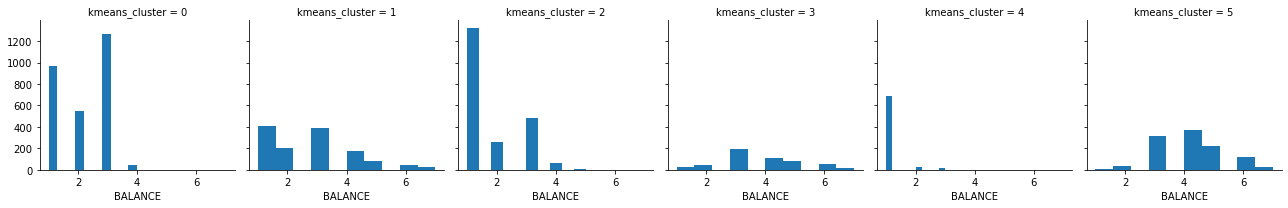

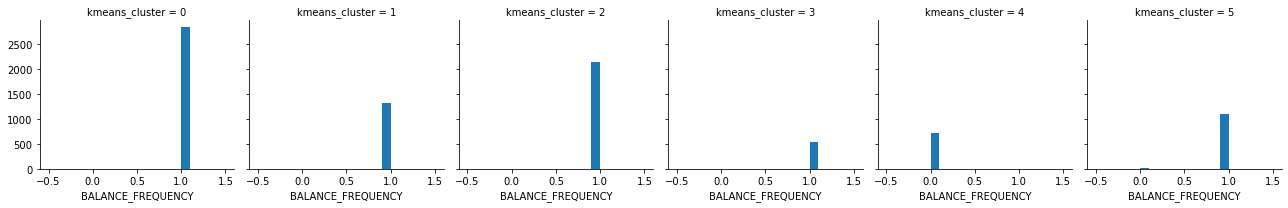

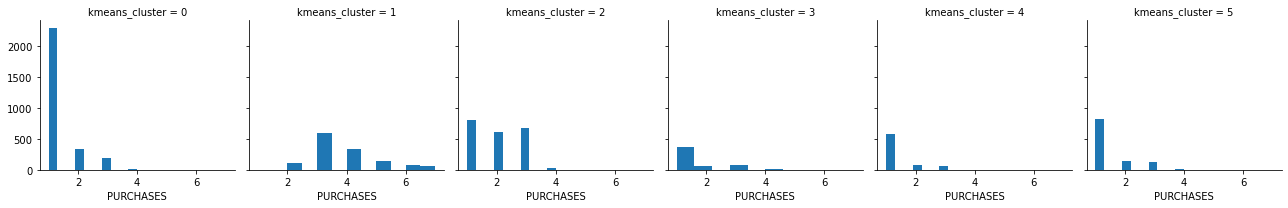

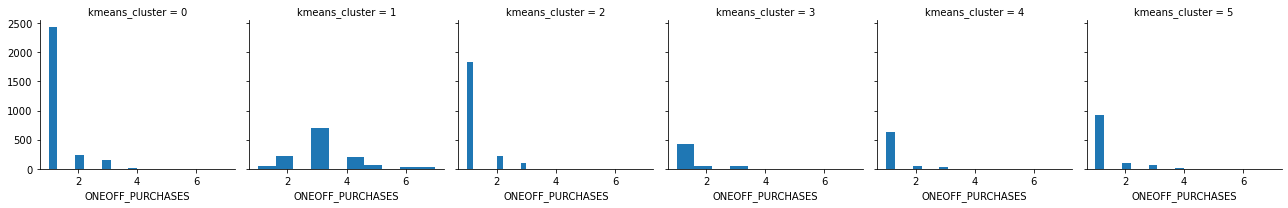

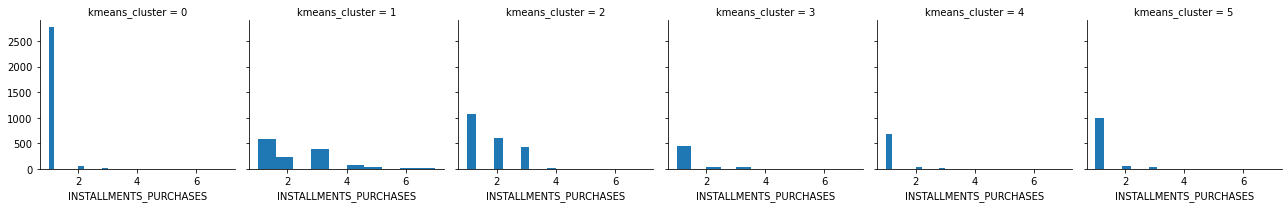

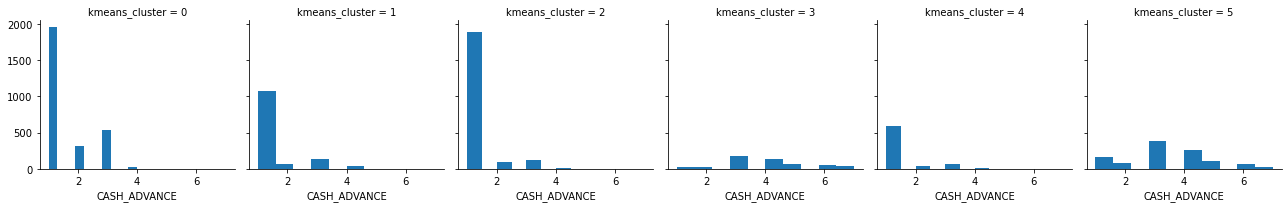

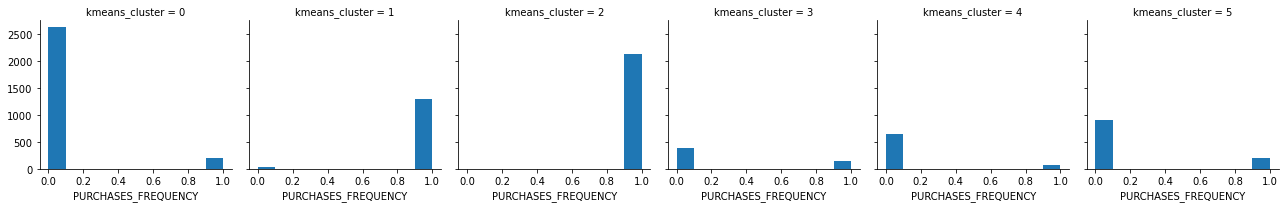

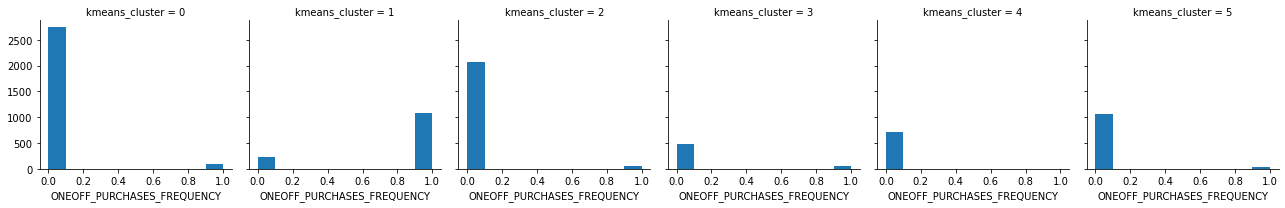

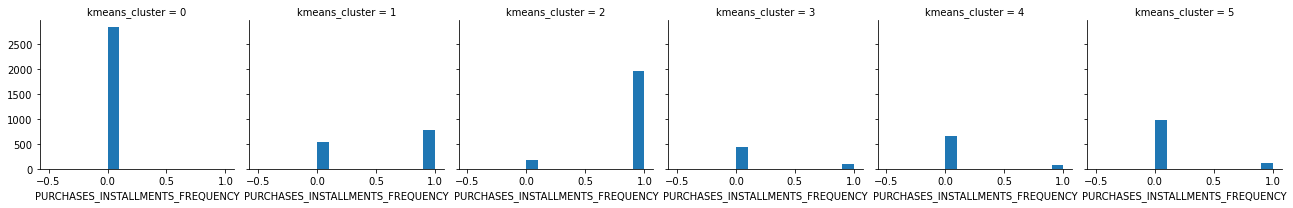

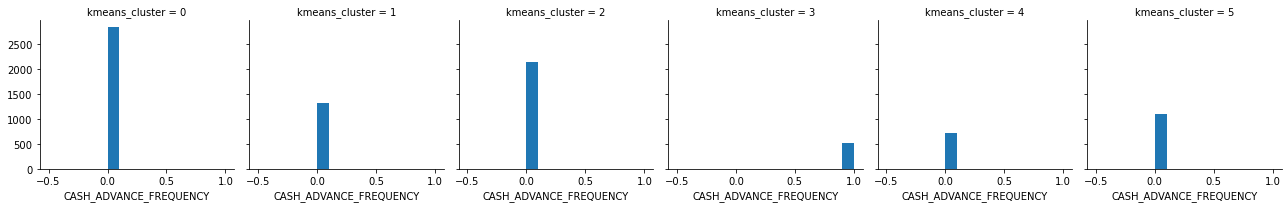

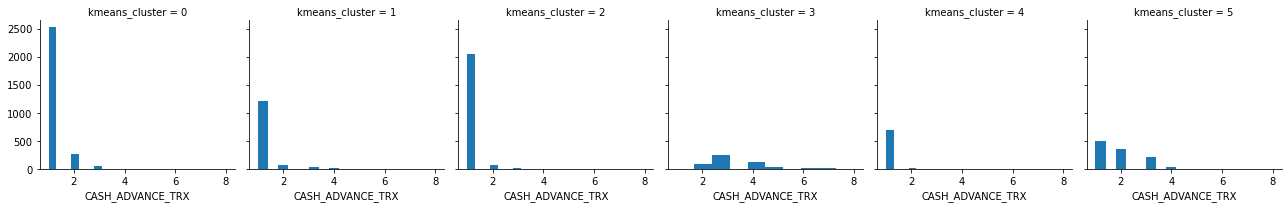

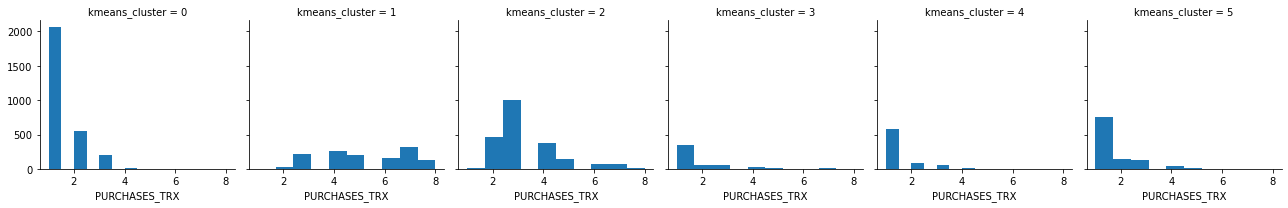

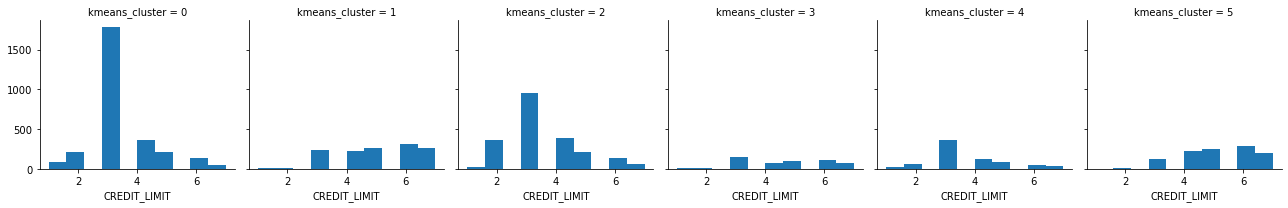

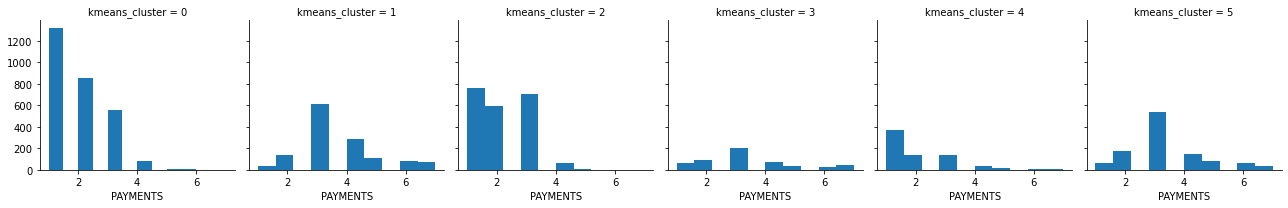

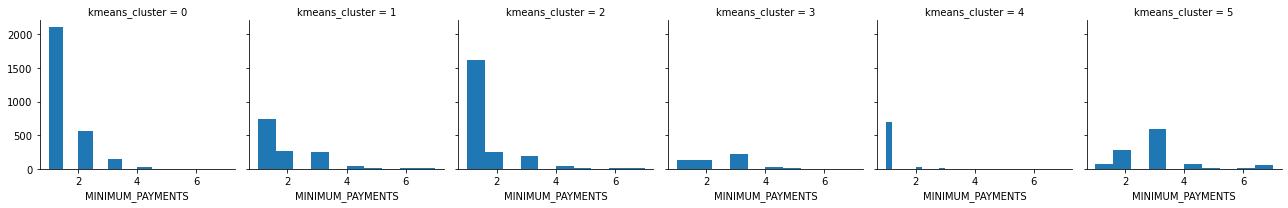

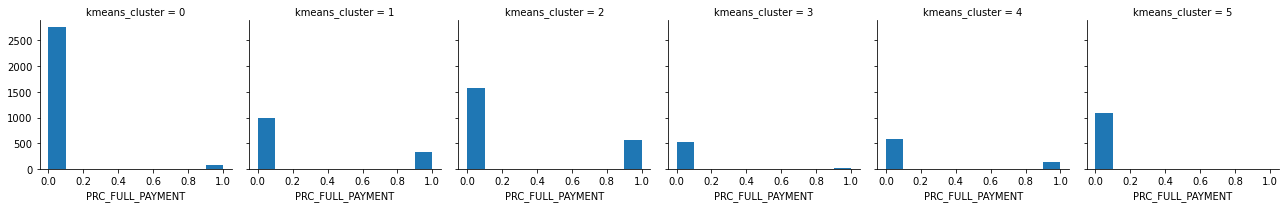

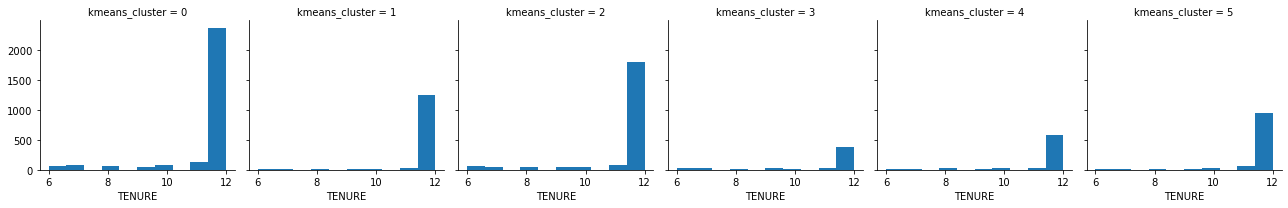

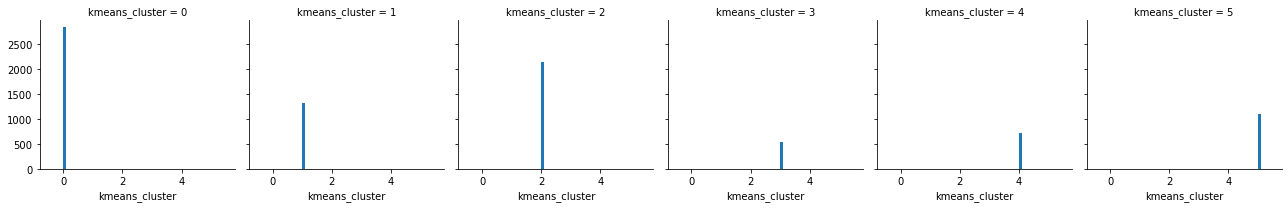

In [51]:
for col in data_kmeans:
    grid = sns.FacetGrid(data_kmeans, col='kmeans_cluster')
    grid.map(plt.hist, col)

Penjelasan cluster Kmeans:

* **Cluster 1** adalah Konsumen yang memiliki batas Credit_Limit sedang akan cenderung melakukan Jumlah transaksi pembelian dalam nilai yang kecil(PURCHASE_TRX) dan jarang melakukan pembelanjaan (PURCHASE_FREQUENCY)

* **Cluster 2** adalah Konsumen yang sering melakukan proses pembelanjaan dengan nilai besar untuk sekali pembelanjaan (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY)

* **Cluster 3** adalah konsumen yang sering  melakukan proses pembelanjaan dengan secara mencicil (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_INSTALLMENST_FREQUENCY)
* **Cluster 4** adalah konsumen yang sering melakukan pembayaran uang tunai di muka (CASH_ADVANCE_FREQUENCY)
* **Cluster 5** adalah konsumen yang melakukan terkadang melakukan proses pembelian (PURCHASE) dengan nilai sekali transaksi yang cukup besar (ONE_OFF_PURCHASES)
* **Cluster 6** adalah konsumen yang jarang melakukan proses pembelajaan dengan menggunakan kartu kredit (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY)


# Overall Analysis

### Dataset

Sampel Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File berada pada level pelanggan dengan 18 variabel perilaku.

### Sumber data

dataset asli berasal dari data kaggle : https://www.kaggle.com/arjunbhasin2013/ccdata

### Objective

membuat clustering pengembangan segmentasi pelanggan untuk menentukan strategi pemasaran


### Exploratory Data Analysis keseluruhan

Dari hasil visualisasi didapatkan informasi sebagai berikut:

* semakin lama tenure kartu kredit yang dimiliki oleh konsumen maka semakin besar jumlah yang dibelanjakan oleh konsumen
* semakin besar nilai yang dibelanjakan oleh konsumen dengan menggunakan kartu kredit maka semakin besar juga Jumlah transaksi pembelian yang dilakukan, hal ini bisa diartikan bahwa konsumen tidak melakukan satu pembelian dengan nilai yang besar. 
* semakin besar Credit_Limit kartu kredit yang dimiliki oleh konsumen maka konsumen tersebut akan semakin tinggi didalam melakukan nilai transaksi pembelanjaan
* semakin tinggi nilai pembelanjaan yang dilakukan oleh konsumen maka semakin besar nilai pembayaran yang berhasil dilakukan atau dengan kata lain tidak menunggak
* semakin besar nilai tagihan minimum yang dibayarkan oleh konsumen maka akan semakin besar nilai yang dibelanjakan atau dengan kata lain konsumen selalu membayar sesuai dengan minimum tagihan dan tidak langsung melunasi tagihan kartu kredit

### Metode elbow untuk menentukan angka cluster

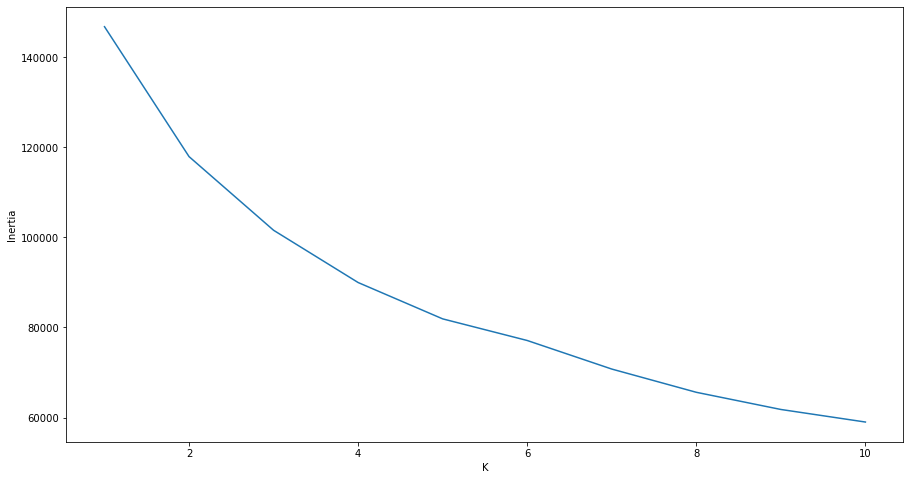

In [52]:
K=[1,2,3,4,5,6,7,8,9,10]
inertia=[KMeans(n_clusters=i).fit(X).inertia_ for i in K]
plt.subplots(figsize=(15,8))
plt.plot(K,inertia)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show();

dari metode elbow terlihat bahwa jumlah cluster yang baik adalah **6 cluster**

### Pendefinisian dan Pelatihan Model Clustering

Pendefinisian dan pelatihan model clustering menggunakan 3 model algoritma clustering yaitu Kmeans, DBSCAN dan Angglomerative dengan menetapkan jumlah cluster sebesar 6 cluster 

### Model Analysis

berdasarkan perbandingan antara algoritma model KMeans, DBSCAN, dan Agglomerative maka model yang dipilih adalah model **Clustering KMeans** karena menghasilkan hasil clustering yang **lebih beragam (randomize) dan juga memiliki waktu training yang lebih singkat dibandingkan dengan model yang lainnya** 

#### Analysis model inferent

dari hasil mencoba data baru untuk melakukan prediksi menggunakan model clustering Kmeans, DBSCAN dan Angglomerative dapat ditarik informasi sebagai berikut:

* Dalam setiap Perubahan pada nilai **features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY** akan menyebabkan atau merubah type cluster konsumen pada model clustering KMeans dan Angglomerative
* Setiap perubahan type cluster konsumen dalam **model Agglomerative bersifat berbanding lurus** dengan perubahan nilai **features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY** atau perubahan terjadi berurutan bedasarkan dari nilai features terkecil  
* Setiap perubahan type cluster konsumen dalam **model KMeans bersifat randomize (acak)** dengan perubahan **nilai features BALANCE_FREQUENCY, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY** atau perubahan terjadi tidak terpengaruh dari urutan nilai features  
* Hasil prediksi dengan menggunakan data baru untuk model DBSCAN Clustering hanya menghasilkan satu type cluster konsumen saja 

#### Pemilihan model

berdasarkan perbandingan antara algoritma model KMeans, DBSCAN, dan Agglomerative maka model yang dipilih adalah model **Clustering KMeans** karena menghasilkan hasil clustering yang **lebih beragam (randomize) dan juga memiliki waktu training yang lebih singkat dibandingkan dengan model yang lainnya** 

#### Penjelasan cluster KMeans:

* **Cluster 1** adalah Konsumen yang memiliki batas Credit_Limit sedang akan cenderung melakukan Jumlah transaksi pembelian dalam nilai yang kecil (PURCHASE_TRX) dan jarang melakukan pembelanjaan (PURCHASE_FREQUENCY)
* **Cluster 2** adalah Konsumen yang sering melakukan proses pembelanjaan dengan nilai besar untuk sekali pembelanjaan (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY)
* **Cluster 3** adalah konsumen yang sering  melakukan proses pembelanjaan dengan secara mencicil (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_INSTALLMENST_FREQUENCY)
* **Cluster 4** adalah konsumen yang sering melakukan pembayaran uang tunai di muka (CASH_ADVANCE_FREQUENCY)
* **Cluster 5** adalah konsumen yang melakukan terkadang melakukan proses pembelian (PURCHASE) dengan nilai sekali transaksi yang cukup besar (ONE_OFF_PURCHASES)
* **Cluster 6** adalah konsumen yang jarang melakukan proses pembelajaan dengan menggunakan kartu kredit (PURCHASE_FREQUENCY & ONEOFF_PURCHASE_FREQUENCY)